## Show Image and corresponding NR-IQA

In [1]:
import numpy as np
import cv2 as cv
import os
import pickle
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
import mediapy as media
import imageio
import OpenEXR as exr
from PIL import Image
import array
from load_blender_data import load_blender_data
import json
import re

## Convert poses to corresponding blender pose

In [14]:
blender_poses_dir = "D:\graduate\\research\\nbv_nerf\\exp_res\\Depth_supervised\\Data"
ring_sample_dir = "D:\graduate\\research\\nbv_nerf\\Real_world_scene\\lego\\0\\Camera_poses.npy"
opencv2blender = np.array([[1,0,0,0],[0,-1,0,0],[0,0,-1,0],[0,0,0,1]])
_, c2w_camera, _, _ = load_blender_data(os.path.join(blender_poses_dir), suggest_type="track", total_num=360)
# print(len(c2w_camera))
center = c2w_camera[1]
# print(center)
ring_sample = np.load(ring_sample_dir)
# ring_sample = ring_sample @ opencv2blender
# print(ring_sample[0])
target_view_blender = center @ ring_sample[15:17]
# target_view_blender = target_view_blender @ opencv2blender
print(target_view_blender)
np.save("D:\graduate\\research\\nbv_nerf\\Real_world_scene\\lego\\0\\Camera_poses_target.npy", target_view_blender)
# test = np.load("D:\graduate\\research\\nbv_nerf\\Real_world_scene\\lego\\0\\Camera_poses_target.npy")
# print(test.shape)

[[[-1.62920685e-07 -7.24846879e-01  6.88909901e-01  2.59303269e+00]
  [ 1.00000000e+00 -1.35070781e-07  9.43737530e-08  6.39645410e-08]
  [ 2.46450912e-08  6.88909901e-01  7.24846879e-01  3.07584902e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]

 [[ 9.65408795e-03 -7.25494176e-01  6.88160483e-01  2.59108106e+00]
  [ 9.99850957e-01 -2.84699281e-03 -1.70281876e-02 -4.41336633e-02]
  [ 1.43130389e-02  6.88222309e-01  7.25358561e-01  3.07716541e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]]


In [12]:
## blend poses
blender_poses_dir = "D:\graduate\\research\\nbv_nerf\\exp_res\\Depth_supervised\\Data"
_, c2w_camera, _, _ = load_blender_data(os.path.join(blender_poses_dir), suggest_type="track", total_num=360)
# print(c2w_camera[0])
# print(c2w_camera[1])
# print(c2w_camera[0:2])
c2w_blend = np.mean(c2w_camera[0:2], axis = 0)
c2w_blend_s = np.mean(c2w_camera[0:3], axis = 0)
# print(c2w_blend)
c2w_blend = np.asarray([c2w_blend, c2w_blend_s])
print(c2w_blend)
np.save("D:\graduate\\research\\nbv_nerf\\Real_world_scene\\lego\\1\\Camera_poses_blend.npy", c2w_blend)

[[[-7.82173648e-02 -8.23934078e-01  5.55750608e-01  2.22300243e+00]
  [ 9.93844151e-01 -6.48451373e-02  4.37385775e-02  1.74954072e-01]
  [ 1.76303629e-08  5.59192896e-01  8.29037488e-01  3.31615019e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]

 [[-5.21448851e-02 -8.00859272e-01  5.89186728e-01  2.35674691e+00]
  [ 9.95896101e-01 -4.32300679e-02  2.91590411e-02  1.16636045e-01]
  [ 1.91348382e-09  5.91481626e-01  8.04261506e-01  3.21704602e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]]


## For pandas imgset / PSNR distribution / PSNR converter

In [3]:
par_dir = "D:\\graduate\\research\\nbv_nerf\\pre_trained\\data_info_files\\train_split_info\\test_ship_rabbit.pkl"
n_dir = "D:\\graduate\\research\\nbv_nerf\\pre_trained\\data_info_files\\train_split_info\\NeRF_split_even.pkl"
with open(par_dir, 'rb') as handle:
    unserialized_data = pickle.load(handle)

with open(n_dir, 'rb') as r:
    nerf_data = pickle.load(r)


In [6]:
# print(len(unserialized_data[1]['test']))
# print(len(nerf_data[1]['train']))
# idx = np.where(nerf_data[1]['train'] == 25205)[0]
# print(nerf_data[1]['train'])
# print(idx)

## random generator
# num = 11
# a = np.random.choice(360,num, replace=False)
# print(a)

## round selector
num = 11
a = np.random.choice(5,num, replace=True)
print(a)

[4 4 2 4 2 0 2 4 4 3 4]


In [3]:
def inv_Rescale(in_array, omin=1, omax=10, nmin=5, nmax=45):
    old_range = omax-omin
    new_range = nmax-nmin
    return ((in_array-omin) * new_range / old_range) + nmin
def Rescale(in_array, omin=5, omax=45, nmin=1, nmax=10):
    old_range = omax-omin
    new_range = nmax-nmin
    return ((in_array-omin) * new_range / old_range) + nmin
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)

In [6]:
print(Rescale(29))
print(inv_Rescale(2.413))

6.4
11.28


(24948,)
[2 7 3 ... 3 5 2]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


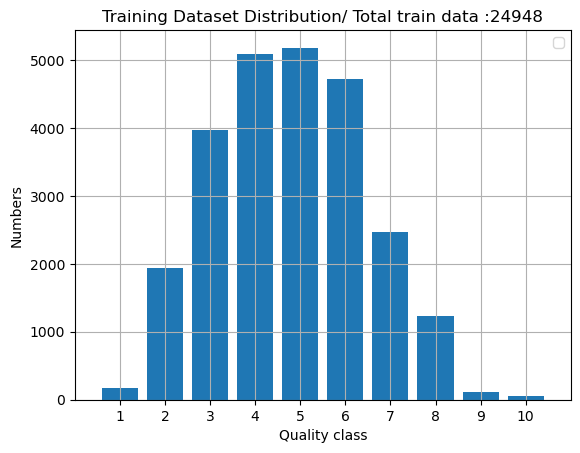

In [7]:
## plot dataset distribution
mode = "train" # /val
dataset_type = "full"

tar_file = "NeRF_split.pkl" if dataset_type == "full" else "NeRF_split_even.pkl"

split_file = f"D:\\graduate\\research\\nbv_nerf\\pre_trained\\data_info_files\\train_split_info\\{tar_file}"
with open(split_file, 'rb') as r:
    nerf_data = pickle.load(r)

train_idx = nerf_data[1]['train']
val_idx = nerf_data[1]['val']

d_idx = train_idx if mode =="train" else val_idx

savediffdir = f"D:\\graduate\\research\\nbv_nerf\\pre_trained\\{mode}_{dataset_type}_dist.png"
csv_dir = "D:\\graduate\\research\\nbv_nerf\\pre_trained\\data_info_files\\meta_info\\NeRF_dataset.csv"
data_set = pd.read_csv(csv_dir)
data_set_list = data_set.values
# print(data_set_list[:])
all_val = data_set_list[d_idx, 1].astype(float)
print(all_val.shape)
# for i in all_val:
#     around_value = np.around(i)
#     print(around_value)
around_value = np.around(all_val).astype(int)
print(around_value)

y = np.zeros(10, dtype=int)
x = np.arange(1, 11)

uni, cnts = np.unique(around_value, return_counts=True)
n_dict = dict(zip(uni, cnts))
for key, value in n_dict.items():
    y[int(key)-1] = value
## plot
plt.grid(True)
plt.title(f"Training Dataset Distribution/ Total {mode} data :{len(all_val)}")
plt.ylabel("Numbers")
plt.xlabel("Quality class")
# plt.ylim(-10, 260)
plt.xticks(x)
plt.xlim(0, 11)
plt.bar(x, y)
# plt.setp(lines, marker="o")
plt.legend(loc='best')
plt.savefig(savediffdir)
plt.show()


In [8]:
csv_dir = "D:\\graduate\\research\\nbv_nerf\\pre_trained\\data_info_files\\meta_info\\NeRF_dataset.csv"
data_set = pd.read_csv(csv_dir)
# print(a['img_name'])
# a['img_name'] = sorted_alphanumeric(a['img_name'])
# print(a['img_name'])
appending = "D:\\graduate\\research\\nbv_nerf\\pre_trained\\data_info_files\\meta_info\\NeRF_full.csv"
# a.to_csv(csv_save_dir, index=False)
append_chair = pd.read_csv(appending)
# print(append_chair)
data_set = data_set.append(append_chair, ignore_index=True)
print(data_set)
print(len(data_set))

# save_dir = "D:\\graduate\\research\\nbv_nerf\\pre_trained\\data_info_files\\meta_info\\NeRF_dataset_mod_full.csv"

# data_set.iloc[3600:7200] = append_chair.iloc[0:3600]

# print(data_set.iloc[3600])
# data_set.to_csv(save_dir, index=False)



# cnt = 0
# idx_col =[]
# col = 'MOS'
# for i in range(len(data_set[col])):
#     if abs(data_set[col][i] - append_chair[col][i])>0.00000001:
#         # print(f"{a[col][i]} and {b[col][i]}")
#         cnt+=1
#         idx_col.append(i+2)
# print(cnt)
# print(idx_col)

        img_name       MOS  c1  c2  c3  c4  c5  c6  c7  c8  c9  c10
0          0.png  2.437157   2  64  33   1   0   0   0   0   0    0
1          1.png  2.412895   3  58  37   2   0   0   0   0   0    0
2          2.png  2.360303   5  54  40   1   0   0   0   0   0    0
3          3.png  2.321722   4  61  34   1   0   0   0   0   0    0
4          4.png  2.285479   8  59  33   0   0   0   0   0   0    0
...          ...       ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...
30235  27715.png  7.059404   0   0   0   0   0  14  66  20   0    0
30236  27716.png  7.213430   0   0   0   0   0   4  69  26   1    0
30237  27717.png  7.149612   0   0   0   0   0   9  69  22   0    0
30238  27718.png  7.019214   0   0   0   0   0  14  74  12   0    0
30239  27719.png  6.991794   0   0   0   0   0  19  69  12   0    0

[30240 rows x 12 columns]
30240


In [9]:
#split file
split_file = "D:\\graduate\\research\\nbv_nerf\\pre_trained\\data_info_files\\train_split_info\\NeRF_split_even.pkl"
PSNR_cols = 27720
# b = np.arange(21600, 25200)
base = None
b = np.arange(0, 360)
for i in range(0, 69, 2):
    print(i)
    if i == 0:
        base = np.arange(0, 360)
    else:
        tmp = b+360*i
        base = np.concatenate([base, tmp])
# print(base[12599])
print(len(base))

# a = np.arange(28800)
# arr = np.setdiff1d(a, b)
# print(len(arr))
# # print(b)
# print(arr[21600])





arr = np.arange(PSNR_cols)
arr = np.setdiff1d(arr, base)
total_size = len(arr)
print(total_size)
val_size = int(total_size/10)
np.random.shuffle(arr)
split = {}
split[1] = {'train':arr[:-val_size], 'val':arr[-val_size:]}

with open(split_file, 'wb') as handle:
    pickle.dump(split, handle, protocol=pickle.HIGHEST_PROTOCOL)


0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
12600
15120


In [10]:
# csv_dir = "D:\\graduate\\research\\nbv_nerf\\pre_trained\\data_info_files\\meta_info\\meta_info_AVADataset.csv"
# data = pd.read_csv(csv_dir)
# print(data.values.tolist()[0][10])
test_csv = "D:\\graduate\\research\\nbv_nerf\\pre_trained\\data_info_files\\meta_info\\test.csv"
columns = ['img_name', 'MOS', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10']
# n_class = np.zeros(10, dtype=int).tolist()

img_name = ['aaa', 'bbb', 'ccc']
MOS_list = [5.5, 8, 3]
tmp_dist = []
tmp_img = []
for idx, v in enumerate(MOS_list):
    n_class = np.zeros(10, dtype=int)
    n_dist = np.clip(np.around(np.random.normal(v, 0.5, 100)), 1, 10)
    unique, counts = np.unique(n_dist, return_counts=True)
    n_dict = dict(zip(unique, counts))
    for key, value in n_dict.items():
        n_class[int(key)-1] = value
    tmp_dist.append(n_class)
    # tmp_img.append(img_name[idx])
df = pd.DataFrame(img_name)
print(df)
df2 = pd.DataFrame(MOS_list)
print(df2)
df3 = pd.DataFrame(tmp_dist)
print(df3)
dfa = pd.concat([df, df2, df3], axis=1)
dfa.columns = columns
print(dfa)
dfa.to_csv(test_csv, index=False)

     0
0  aaa
1  bbb
2  ccc
     0
0  5.5
1  8.0
2  3.0
   0   1   2   3   4   5   6   7   8  9
0  0   0   0   3  43  50   4   0   0  0
1  0   0   0   0   0   0  14  72  14  0
2  0  14  68  18   0   0   0   0   0  0
  img_name  MOS  c1  c2  c3  c4  c5  c6  c7  c8  c9  c10
0      aaa  5.5   0   0   0   3  43  50   4   0   0    0
1      bbb  8.0   0   0   0   0   0   0  14  72  14    0
2      ccc  3.0   0  14  68  18   0   0   0   0   0    0


In [11]:
## generate data sequence
np.random.seed(10)
layer_1 = np.random.choice(np.arange(0, 80), 1, replace=False)
layer_2 = np.random.choice(np.arange(80, 160), 2, replace=False)
layer_3 = np.random.choice(np.arange(160, 240), 3, replace=False)
layer_4 = np.random.choice(np.arange(240, 360), 4, replace=False)
all_layer = np.concatenate([layer_1, layer_2, layer_3, layer_4])
target = np.random.permutation(all_layer)
print(all_layer)
print(target)

[ 41 115  86 206 237 176 354 317 279 248]
[317  86 115  41 354 206 279 248 237 176]


## For Test Image / vis depth

In [12]:
## read json and add NBV
Base_dir = "D:\\graduate\\research\\nbv_nerf\\nerf_synthetic\\lego"
Source_file = "transforms_train"
target_file = "transforms_train_2view"

# now list must be load in and write out
now_list = [1, 15]
target_list= [10, 15]

##  database
with open(os.path.join(Base_dir, f'{Source_file}.json'), 'r') as soucefp:
    meta = json.load(soucefp)


## original set
with open(os.path.join(Base_dir, f'{target_file}.json'), 'r') as targetfp:
    target = json.load(targetfp)

## append then together
for i in target_list:
    if i in now_list:
        continue
    target['frames'].append(meta['frames'][i])
    now_list.append(i)
    print(now_list)

## write to original file
with open(os.path.join(Base_dir, f'{target_file}.json'), 'w') as targetfp:
    json.dump(target, targetfp, indent = 4)

[1, 15, 10]


In [13]:
Base_dir = "Depth_supervised\\lego\\TensoRF_random_2"
Image_dir = "imgs_path_all"


Data_dir = "Depth_supervised\\Data"
# Camera_dir = "results_5"
def normalize(img):
    _min = img.min()
    _max = img.max()
    return (img-_min)/(_max-_min)

c2w = np.load(os.path.join(Base_dir, Image_dir, 'Camera_poses.npy'))
# c2w = c2w[:, 0:3, 3].T
print(c2w[0])

# Data_dir = "Depth_supervised\\Data"

[[ 1.0000000e+00  1.1507917e-16 -4.1885392e-17 -1.6754157e-16]
 [-1.2246469e-16  9.3969262e-01 -3.4202015e-01 -1.3680806e+00]
 [ 0.0000000e+00  3.4202015e-01  9.3969262e-01  3.7587705e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00]]


In [5]:
# Base_dir = "test_image"
# Imgs = [os.path.join(Base_dir, f) for f in sorted(os.listdir(os.path.join(Base_dir))) \
#     if f.endswith('bmp')]
# Imgs_col = np.array([Image.open(Imgs[i]) for i in range(len(Imgs))])
# cor_score = np.loadtxt(os.path.join(Base_dir, 'test_output.txt'))

# media.show_images(
#     [Imgs_col[0], Imgs_col[2], Imgs_col[3], Imgs_col[1]],
#     titles = [f'score: {cor_score[0]:03f}', f'score: {cor_score[2]:03f}', f'score: {cor_score[3]:03f}', f'score: {cor_score[1]:03f}'],
#     columns = 4, height = 320
# )

## show gray scale
def visualize_depth_numpy(depth, minmax=None, cmap=cv.COLORMAP_JET):
    """
    depth: (H, W)
    """

    x = np.nan_to_num(depth) # change nan to 0
    if minmax is None:
        mi = np.min(x[x>0]) # get minimum positive depth (ignore background)
        ma = np.max(x)
    else:
        mi,ma = minmax
    idx = np.where( abs(x-2.0)<0.2)

    x = (x-mi)/(ma-mi+1e-8) # normalize to 0~1

    x = (255*x).astype(np.uint8)
    x = cv.applyColorMap(x, cmap)
    # x[idx] = 255
    # print(len(x[idx]))
    return x, [mi,ma]

Base_dir = "Depth_supervised\\lego\\NBV_exp\\Uniform_views"
Project_dir = "tensorf_lego_VM_Uniform_1\\image"
num = 174
file = f"{num}.npz"
depth = np.load(os.path.join(Base_dir, Project_dir, file))['depth']
print(depth.min())
print(depth.max())
d, _ = visualize_depth_numpy(depth, [2.0, 6.0])
imageio.imwrite(os.path.join(Base_dir, Project_dir, f"{num}_d_color.png"), d)
# plt.imshow(d)
# plt.show()
# cv.imwrite(os.path.join(Base_dir, "113_d.png"), depth)
## test min depth 
# Base_dir = "results_10"
# file = "r_7_depth_0001.exr"
# test = exr.InputFile(os.path.join(Base_dir, file))
# (R, G, B) = [array.array('f', test.channel(Chan)).tolist() for Chan in ("R", "G", "B") ]

# R_np = np.asarray(R, dtype = np.float32)
# R_np = R_np.reshape((800, 800))
# print(R_np.min())

-0.88110584
5.278579


## Image Concatenate

In [6]:
Base_dir = "Depth_supervised\\lego\\NBV_exp\\Uniform_views"
# Project_dir = "tensorf_lego_VM_Uniform_1\\image"
Project_dir = "tensorf_lego_VM_Uniform_1\\image"
num = 174
file_A = f"{num}.png"
file_B = f"{num}_d_color.png"
a = imageio.imread(os.path.join(Base_dir, Project_dir, file_A))
b = imageio.imread(os.path.join(Base_dir, Project_dir, file_B))
res = np.concatenate((a, b), axis = 1)
imageio.imwrite(os.path.join(Base_dir, Project_dir, f"{num}_concatenate.png"), res)

## For Depth-supervised

In [ ]:
Base_dir = "Depth_supervised\\blender_paper_lego_depth_test_5_DSNeRF"
Set_dir = "testset_010000"
Imgs = [os.path.join(Base_dir, Set_dir, f) for f in sorted(os.listdir(os.path.join(Base_dir, Set_dir))) \
    if f.endswith('png')]
Imgs = Imgs[::2] # for depth directory
Imgs_col = np.array([Image.open(Imgs[i]) for i in (0, 3, 6, 9)])
cor_score = np.loadtxt(os.path.join(Base_dir, '0369_test5_depth_output.txt'))

media.show_images(
    [Imgs_col[0], Imgs_col[1], Imgs_col[2], Imgs_col[3]],
    titles = [f'score: {cor_score[0]:03f}', f'score: {cor_score[1]:03f}', f'score: {cor_score[2]:03f}', f'score: {cor_score[3]:03f}'],
    columns = 4, height = 320
)

## For Fully Training NeRF

In [ ]:
Base_dir = "full"
Set_dir = "testset_for_render_only"
Imgs = [os.path.join(Base_dir, Set_dir, f) for f in sorted(os.listdir(os.path.join(Base_dir, Set_dir))) \
    if f.endswith('png')]
# Imgs = Imgs[::2] # for depth directory
Imgs_col = np.array([Image.open(Imgs[i]) for i in (0, 3, 6, 9)])
cor_score = np.loadtxt(os.path.join(Base_dir, 'full_100views_render_only.txt'))

media.show_images(
    [Imgs_col[0], Imgs_col[1], Imgs_col[2], Imgs_col[3]],
    titles = [f'score: {cor_score[0]:03f}', f'score: {cor_score[3]:03f}', f'score: {cor_score[6]:03f}', f'score: {cor_score[9]:03f}'],
    columns = 4, height = 320
)

## Calculate Depth error (close to near)

In [ ]:
Base_dir = "Depth_supervised\\lego\\blender_paper_lego_random_5_crop_true_table"
Image_dir = "renderonly_path_009999"
Save_dir = "result"

Imgs = [os.path.join(Base_dir, Image_dir, f) for f in sorted(os.listdir(os.path.join(Base_dir, Image_dir))) \
    if f.endswith('npz')]
# print(Imgs)
Size = np.load(Imgs[0])['depth'].shape
Total_pixels = Size[0]*Size[1]

depth_err_col = []
for Img_nam in Imgs:
    depth = np.load(Img_nam)['depth']
    Error = np.abs(depth - 2.0) # diff near
    N_Error = (Error < 0.2).sum() / Total_pixels  # normalize [0-1]
    depth_err_col.append(N_Error)
depth_err_col = np.array(depth_err_col)
print(depth_err_col.max())
np.savetxt(os.path.join(Base_dir, Save_dir, 'Depth_Errors.txt'), depth_err_col, fmt='%f')

# print(depth_err_col)
# print(np.load(Imgs[1])['depth'][100, 180])

1.0


## Compute Quality Loss (\alpha * NRIQA + \beta * Depth_Outliers)

In [11]:
def standarization(X):
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    return (X - X_mean)/X_std

Global_idx = 1
suggest_type = "NBV_suggest" # NBV_suggest / Random_views / Uniform_views
exp_type = "Rand" # DO / NRIQA /Rand / AllUncert/ Max
Model = "lego" # lego / chair / rabbit

if suggest_type == "NBV_suggest":
    save_type = "NBV"
elif suggest_type == "Random_views":
    save_type = "Random_NBV"
else:
    save_type = "Uniform"

if exp_type == "AllUncert":
    exp_name = f'{Model}_AllUncert'
elif exp_type == "NRIQA":
    exp_name = f'{Model}_NRIQA'
elif exp_type == "DO":
    exp_name = f'{Model}_DO'
elif exp_type == "Max":
    exp_name = f'{Model}_Max'
else:
    exp_name = f'{Model}_Rand'

# Save_dir = f"tensorf_{Model}_VM_{save_type}_1"
Base_dir = f"Depth_supervised\\lego\\NBV_exp\\{suggest_type}\\{exp_type}\\{exp_name}"
Save_dir = f"{Model}_{save_type}_{exp_type}_{Global_idx}_res"
# Save_dir = "test_new_IQA"

NRIQA = np.loadtxt(os.path.join(Base_dir, Save_dir, 'IQA_output.txt'))
Raw_NRIQA = NRIQA.copy()
max_IQA = 10
NRIQA = max_IQA-NRIQA ## reverse value to match uncertainty (higher is bad)
NRIQA /= 9 # normalize [1-10] [1-100] 
# NRIQA = standarization(NRIQA)

DO = np.loadtxt(os.path.join(Base_dir, Save_dir, 'Depth_Errors.txt'))
# DO = standarization(DO)

# print(good_IQA_idx)
alpha = 1
beta = 0
# alpha = 1/90
# beta = 89/90
test = NRIQA*alpha+DO*beta
# test = DO
print(test.shape)
# print(NRIQA)
min_val = None

(360,)


## Load Test Views PSNR

In [115]:
# suggest_type = "NBV_suggest" # NBV_suggest / Random_views / Uniform_views
# exp_type = "Rand" # DO / NRIQA /Rand
# Model = "lego" # lego / chair / drums /ship

if suggest_type == "NBV_suggest":
    save_type = "NBV"
elif suggest_type == "Random_views":
    save_type = "Random_NBV"
else:
    save_type = "Uniform"

if exp_type == "AllUncert":
    exp_name = f'{Model}_AllUncert'
elif exp_type == "NRIQA":
    exp_name = f'{Model}_NRIQA'
elif exp_type == "DO":
    exp_name = f'{Model}_DO'
elif exp_type == "Max":
    exp_name = f'{Model}_Max'
else:
    exp_name = f'{Model}_Rand'

Base_dir = f"Depth_supervised\\lego\\NBV_exp\\{suggest_type}\\{exp_type}\\{exp_name}"
Save_dir = f"{Model}_{save_type}_{exp_type}_{Global_idx}_res"
PSNR_test = np.loadtxt(os.path.join(Base_dir, Save_dir, 'test_views_PSNR.txt'))
min_val = 5.0
max_val = 45.0
PSNR_test = np.clip(PSNR_test, min_val, max_val)
# print(test)

## Get Information of NRIQA and DO Selection Idx

In [ ]:
bad_Q = np.where(test == test.max())[0][0]
# bad_PSNR = np.where(PSNR_test == PSNR_test.min())[0][0]
# worstIQA_idx = np.where(NRIQA == NRIQA.max())[0][0]
# worstDO_idx = np.where(DO == 0)[0][10]
# print(bad_Q)
# print(bad_PSNR)
# print(NRIQA[worstDO_idx])
# print(DO[worstDO_idx])
print(f"bad index: {bad_Q}")

good_IQA_idx = np.where(NRIQA == NRIQA.max())[0][0]
good_DO_idx = np.where(DO == DO.max())[0][0]
print(good_IQA_idx)
print(good_DO_idx)

print(f"NRIQA dominate: NRIQA: {NRIQA[good_IQA_idx]} + DO: {DO[good_IQA_idx]*89} = {NRIQA[good_IQA_idx] + DO[good_IQA_idx]*89}")
print(f"DO dominate: NRIQA: {NRIQA[good_DO_idx]} + DO: {DO[good_DO_idx]*89} = {NRIQA[good_DO_idx] + DO[good_DO_idx]*89}")
print(f"Suggest id:{bad_Q} NRIQA: {NRIQA[bad_Q]} + DO: {DO[bad_Q]*89} = {NRIQA[bad_Q] + DO[bad_Q]*89}")

bad index: 353
353
350
NRIQA dominate: NRIQA: 0.5866402520073785 + DO: 0.053678125 = 0.6403183770073785
DO dominate: NRIQA: 0.5059175491333008 + DO: 0.11069375000000001 = 0.6166112991333008
Suggest id:353 NRIQA: 0.5866402520073785 + DO: 0.053678125 = 0.6403183770073785


In [ ]:
min_PSNR_idx = np.where(PSNR_test==PSNR_test.min())[0][0]
print(min_PSNR_idx)

358


## Delete All and add all views for transform_{suggest_type} Only Do once !!!!!!!!!!

In [12]:
Source_file = "Depth_supervised\\Data\\Render_Specify_views_lego\\transforms_train"
Target_file = f"Depth_supervised\\Data\\transforms_train_{suggest_type}"
## file for now view txt
File_path = f"Depth_supervised\\lego\\NBV_exp\\{suggest_type}\\{exp_type}\\{exp_name}"
# os.makedirs(f'{File_path}', exist_ok=True)
##  database
with open(os.path.join(f'{Source_file}.json'), 'r') as soucefp:
    meta = json.load(soucefp)

## original set
with open(os.path.join(f'{Target_file}.json'), 'r') as targetfp:
    target = json.load(targetfp)
## remove all views first
target['frames'] = []

now_list = np.loadtxt(os.path.join(f'{File_path}', 'Now_Views.txt'))
target_list = now_list[2:]

print(target_list)

## write target
## append then together
for i in target_list:
    print(i)
    target['frames'].append(meta['frames'][int(i)])

with open(os.path.join(f'{Target_file}.json'), 'w') as targetfp:
    json.dump(target, targetfp, indent = 4)


[ 61. 119. 273. 329. 150. 190.  19. 205. 328. 209. 356. 136.  97. 151.
  68.]
61.0
119.0
273.0
329.0
150.0
190.0
19.0
205.0
328.0
209.0
356.0
136.0
97.0
151.0
68.0


## 3D interactive

In [13]:
Base_dir = "Depth_supervised\\lego\\NBV_exp"
Image_dir = "camera_pose"
Savefig = False
saveDir_pic = f"Depth_supervised\\lego\\NBV_exp\\{suggest_type}\\{exp_type}\\{exp_name}\\pic"
os.makedirs(f'{saveDir_pic}', exist_ok=True)
# Base_dir = "Depth_supervised"
# Image_dir = "HG"

Data_dir = "Depth_supervised\\Data"
# suggest_type="Random" # NBV
# Camera_dir = "results_5"
def normalize(img, mi_ma=None, reverse=False):
    if mi_ma is not None:
        _min, _max = mi_ma
    else:
        _min = img.min()
        _max = img.max()
    return 1 - (img-_min)/(_max-_min) if reverse else (img-_min)/(_max-_min)

c2w = np.load(os.path.join(Base_dir, Image_dir, 'Camera_poses_golden_85.npy'))
c2w = c2w[:, 0:3, 3].T
print(c2w[1].shape)

## read camera pose by training json file
_, c2w_camera, _, _ = load_blender_data(os.path.join(Data_dir), suggest_type=suggest_type, total_num=Global_idx+4)

if alpha == 1: #no need normalize
    nor_test = test
    # nor_test = normalize(test)
else:
    nor_test = normalize(test)
if min_val is not None:
    PSNR_nor_test = normalize(PSNR_test, [min_val, max_val], reverse=True)
# print(nor_test)
c2w_camera = c2w_camera[:, 0:3, 3].T
print(c2w_camera)
# print(nor_test)

(360,)
[[-0.118502    2.1997645  -0.7538537   3.0392015  -0.27084714]
 [-2.0725002  -1.7076775  -3.6638741   2.4443016  -3.0458837 ]
 [ 3.4191666   2.871389    1.4169445   0.88805556  2.5786111 ]]


In [14]:
# Enabling the `widget` backend.
# This requires jupyter-matplotlib a.k.a. ipympl.
# ipympl can be install via pip or conda.
%matplotlib qt
# aka import ipympl

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure(figsize=(12, 12))
ax = fig.gca(projection='3d', computed_zorder=False)

scale = 4
# Make data.
X = c2w[0]
Y = c2w[1]
Z = c2w[2]

cX = c2w_camera[0]
cY = c2w_camera[1]
cZ = c2w_camera[2]

# Plot the surface.
# surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
#                    linewidth=0, antialiased=False)
# surf = ax.plot_trisurf(X, Y, Z, cmap=cm.coolwarm,
#                    linewidth=0, antialiased=False)
# surf = ax.scatter(X, Y, Z, c=nor_test, cmap=cm.jet, s=50, alpha=.7,
#                    linewidth=0, antialiased=False, vmin=0., vmax=1.)

surf = ax.scatter(X, Y, Z, c=nor_test ,cmap=cm.jet, s=50, alpha=.7,
                   linewidth=0, antialiased=False, vmin=0., vmax=1.)

# surf = ax.scatter(X, Y, Z, s=50, alpha=.7,
#                    linewidth=0, antialiased=False, vmin=0., vmax=1.)
                   
ax.scatter(cX, cY, cZ, c='r', cmap='Reds', marker='^', alpha=.5, s=300, label='Training Data Views')

# for i in range(len(X)):
#    ax.text(X[i], Y[i], Z[i], '%s' %(str(i)), size = 8, zorder = 1)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# Customize the z axis.
ax.set_box_aspect((1, 1, 0.5))
ax.set_zlim(0, 4)
ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# rotate the axes and update
for angle in range(0, 360):
   ax.view_init(90, -90)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.legend(loc='best')
if Savefig:
   # plt.savefig(f"{saveDir_pic}\{Model}_{exp_type}_{Global_idx}.png", bbox_inches='tight')
   plt.savefig(f"{saveDir_pic}\{Model}_{exp_type}_{Global_idx}_ntestColor.png", bbox_inches='tight')
   # plt.savefig(f"{saveDir_pic}\{Model}_{exp_type}_{Global_idx}_normalize.png", bbox_inches='tight')
plt.show()

<ipython-input-14-bdd85dd80fcd>:14: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d', computed_zorder=False)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


## 3D vis for PSNR

In [118]:
# Enabling the `widget` backend.
# This requires jupyter-matplotlib a.k.a. ipympl.
# ipympl can be install via pip or conda.
%matplotlib qt
# aka import ipympl

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure(figsize=(12, 12))
ax = fig.gca(projection='3d', computed_zorder=False)

scale = 4
# Make data.
X = c2w[0]
Y = c2w[1]
Z = c2w[2]

cX = c2w_camera[0]
cY = c2w_camera[1]
cZ = c2w_camera[2]

# Plot the surface.
# surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
#                    linewidth=0, antialiased=False)
# surf = ax.plot_trisurf(X, Y, Z, cmap=cm.coolwarm,
#                    linewidth=0, antialiased=False)
surf = ax.scatter(X, Y, Z, c=PSNR_nor_test, cmap=cm.jet, s=50, alpha=.7,
                   linewidth=0, antialiased=False, vmin=0., vmax=1.)
ax.scatter(cX, cY, cZ, c='r', cmap='Reds', marker='^', alpha=.5, s=300, label='Training Data Views')

# for i in range(len(X)):
#    ax.text(X[i], Y[i], Z[i], '%s' %(str(i)), size = 8, zorder = 1)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# Customize the z axis.
ax.set_box_aspect((1, 1, 0.5))
ax.set_zlim(0, 4)
ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# rotate the axes and update
for angle in range(0, 360):
   ax.view_init(90, -90)
   # ax.view_init(30, 40)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.legend(loc='best')
if Savefig:
   plt.savefig(f"{saveDir_pic}\{Model}_{exp_type}_{Global_idx}_gt_PSNR.png", bbox_inches='tight')
plt.show()

<ipython-input-118-a0ebe779c1e6>:14: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d', computed_zorder=False)


## For show evaluation

### MEAN

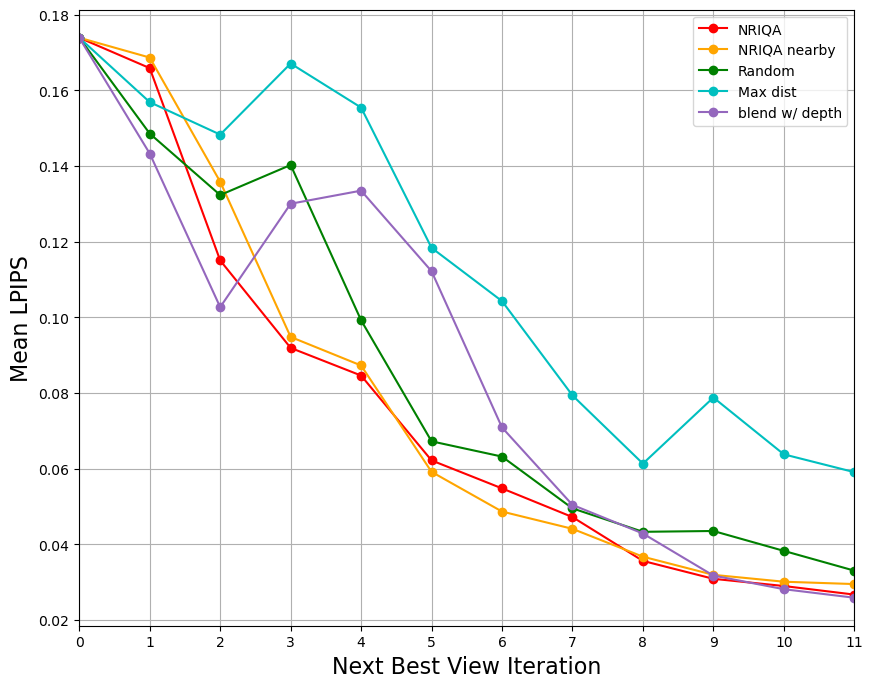

In [67]:
# %matplotlib notebook
# proj_dir = "Depth_supervised\\lego\\NBV_exp\\NBV_suggest\\

model_name = "rabbit" # lego # chair # rabbit
metric = "LPIPS" # PSNR# SSIM # LPIPS_vgg # LPIPS

ALL_Dir = f"Depth_supervised\\lego\\NBV_exp\\NBV_suggest\\AllUncert\\{model_name}_AllUncert"
NRIQA_Dir = f"Depth_supervised\\lego\\NBV_exp\\NBV_suggest\\NRIQA\\{model_name}_NRIQA"
# DO_Dir = "Depth_supervised\\lego\\NBV_exp\\NBV_suggest\\lego_DO"
Rand_Dir = f"Depth_supervised\\lego\\NBV_exp\\NBV_suggest\\Rand\\{model_name}_Rand"
Round_Dir = f"Depth_supervised\\lego\\NBV_exp\\NBV_suggest\\Round\\{model_name}_Round"
Max_Dir = f"Depth_supervised\\lego\\NBV_exp\\NBV_suggest\\Max\\{model_name}_Max"

save_dir = "Depth_supervised\\lego\\NBV_exp\\NBV_suggest\\exp_pic"


m_idx = 0
base = np.loadtxt(Rand_Dir+"/"+f"{model_name}_NBV_Rand_0_res/mean.txt")

if metric == "PSNR":
    m_idx = 0
elif metric == "SSIM":
    m_idx = 1 
else: # LPIPS_vgg
    m_idx = 2

All_value=[]
NRIQA_value=[]
DO_value=[]
Rand_value=[]
Round_value=[]
Max_value=[]

All_value.append(base[m_idx])
NRIQA_value.append(base[m_idx])
# DO_value.append(base[m_idx])
Rand_value.append(base[m_idx])
Round_value.append(base[m_idx])
Max_value.append(base[m_idx])

for i in range(1, 12):
    All_name = f'{model_name}_NBV_AllUncert_{i}_res'
    NRIQA_name = f'{model_name}_NBV_NRIQA_{i}_res'
    # DO_name = f'lego_NBV_DO_{i}'
    Rand_name = f'{model_name}_NBV_Rand_{i}_res'
    Round_name = f'{model_name}_NBV_round_{i}_res'
    Max_name = f'{model_name}_NBV_Max_{i}_res'

    AL = np.loadtxt(ALL_Dir+"/"+f"{All_name}/mean.txt")
    NR = np.loadtxt(NRIQA_Dir+"/"+f"{NRIQA_name}/mean.txt")
    Rand = np.loadtxt(Rand_Dir+"/"+f"{Rand_name}/mean.txt")
    Round = np.loadtxt(Round_Dir+"/"+f"{Round_name}/mean.txt")
    Mx = np.loadtxt(Max_Dir+"/"+f"{Max_name}/mean.txt")
    
    All_value.append(AL[m_idx])
    NRIQA_value.append(NR[m_idx])
    Rand_value.append(Rand[m_idx])
    Round_value.append(Round[m_idx])
    Max_value.append(Mx[m_idx])
    
    # if i > 8:
    #     DO_value.append(None)
    #     continue
    # DO_value.append(np.loadtxt(DO_Dir+"/"+f"{DO_name}/mean.txt"))

All_value=np.asarray(All_value)
NRIQA_value=np.asarray(NRIQA_value)
# DO_value=np.asarray(DO_value)
Rand_value=np.asarray(Rand_value)
Round_value=np.asarray(Round_value)
Max_value=np.asarray(Max_value)

# plot
x = np.arange(0, 12)
plt.figure(figsize=(10, 8))
plt.grid(True)
# plt.title(f"{model_name} Mean {metric} with different metrics")
plt.ylabel(f"Mean {metric}", fontsize=16)
plt.xlabel("Next Best View Iteration", fontsize=16)
# plt.ylim(-10, 260)
plt.xticks(x)
plt.xlim(0, 11)
lines_NRIQA = plt.plot(x, NRIQA_value, label="NRIQA", color='r')
lines_Round = plt.plot(x, Round_value, label="NRIQA nearby", color='orange')
lines_Rand = plt.plot(x, Rand_value, label="Random", color='g')
lines_Max = plt.plot(x, Max_value, label="Max dist", color='c')
# lines_DO = plt.plot(x, DO_value, label="DO")
lines_All = plt.plot(x, All_value, label="blend w/ depth", color='tab:purple')
lines = (lines_NRIQA, lines_Round, lines_Rand, lines_Max, lines_All)

# plt.axvspan(8.95, 9.05, color='red', alpha=0.7, label="Reach terminal threshold")
plt.setp(lines, marker="o")
plt.legend(loc='best')
plt.savefig(save_dir + f'/{model_name}_5_mean_{metric}.jpg', bbox_inches='tight')
plt.show()

### MIN and std

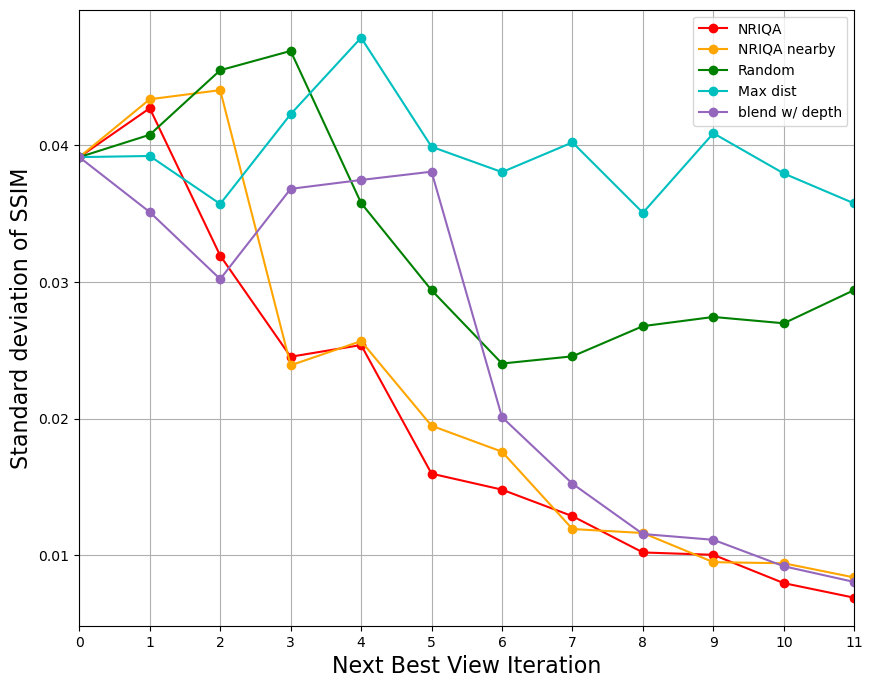

In [76]:

model_name = "rabbit" # lego # chair # rabbit
model_type = "std" #min / std
metric = "ssim" # PSNR # ssim # LPIPS_vgg # LPIPS

ALL_Dir = f"Depth_supervised\\lego\\NBV_exp\\NBV_suggest\\AllUncert\\{model_name}_AllUncert"
NRIQA_Dir = f"Depth_supervised\\lego\\NBV_exp\\NBV_suggest\\NRIQA\\{model_name}_NRIQA"
# DO_Dir = "Depth_supervised\\lego\\NBV_exp\\NBV_suggest\\lego_DO"
Rand_Dir = f"Depth_supervised\\lego\\NBV_exp\\NBV_suggest\\Rand\\{model_name}_Rand"
Round_Dir = f"Depth_supervised\\lego\\NBV_exp\\NBV_suggest\\Round\\{model_name}_Round"
Max_Dir = f"Depth_supervised\\lego\\NBV_exp\\NBV_suggest\\Max\\{model_name}_Max"

save_dir = "Depth_supervised\\lego\\NBV_exp\\NBV_suggest\\exp_pic"


base = np.loadtxt(Rand_Dir+"/"+f"{model_name}_NBV_Rand_0_res/test_views_{metric}.txt")
if model_type == "min":
    base = np.min(base)
else:
    base_mean = np.mean(base)
    base = np.std(base)
# print(base)
All_value=[]
NRIQA_value=[]
DO_value=[]
Rand_value=[]
Round_value=[]
Max_value=[]

##mean
All_value_mean=[]
NRIQA_value_mean=[]
# DO_value=[]
Rand_value_mean=[]
Round_value_mean=[]
Max_value_mean=[]

All_value_mean.append(base_mean)
NRIQA_value_mean.append(base_mean)
Rand_value_mean.append(base_mean)
Round_value_mean.append(base_mean)
Max_value_mean.append(base_mean)
#######

All_value.append(base)
NRIQA_value.append(base)
# DO_value.append(base)
Rand_value.append(base)
Round_value.append(base)
Max_value.append(base)


for i in range(1, 12):
    All_name = f'{model_name}_NBV_AllUncert_{i}_res'
    NRIQA_name = f'{model_name}_NBV_NRIQA_{i}_res'
    # DO_name = f'lego_NBV_DO_{i}'
    Rand_name = f'{model_name}_NBV_Rand_{i}_res'
    Round_name = f'{model_name}_NBV_round_{i}_res'
    Max_name = f'{model_name}_NBV_Max_{i}_res'

    all_v = np.loadtxt(ALL_Dir+"/"+f"{All_name}/test_views_{metric}.txt")
    NRIQA_v = np.loadtxt(NRIQA_Dir+"/"+f"{NRIQA_name}/test_views_{metric}.txt")
    Rand_v = np.loadtxt(Rand_Dir+"/"+f"{Rand_name}/test_views_{metric}.txt")
    Round_v = np.loadtxt(Round_Dir+"/"+f"{Round_name}/test_views_{metric}.txt")
    Mx_v = np.loadtxt(Max_Dir+"/"+f"{Max_name}/test_views_{metric}.txt")

    if model_type == "min":
        All_value.append(np.min(all_v))
        NRIQA_value.append(np.min(NRIQA_v))
        Rand_value.append(np.min(Rand_v))
        Round_value.append(np.min(Round_v))
        Max_value.append(np.min(Mx_v))
        # print(np.min(Rand_v))
        # print(np.where(Rand_v == np.min(Rand_v))[0])
    else:
        All_value.append(np.std(all_v))
        NRIQA_value.append(np.std(NRIQA_v))
        Rand_value.append(np.std(Rand_v))
        Round_value.append(np.std(Round_v))
        Max_value.append(np.std(Mx_v))

        All_value_mean.append(np.mean(all_v))
        NRIQA_value_mean.append(np.mean(NRIQA_v))
        Rand_value_mean.append(np.mean(Rand_v))
        Round_value_mean.append(np.mean(Round_v))
        Max_value_mean.append(np.mean(Mx_v))
    # if i > 8:
    #     DO_value.append(None)
    #     continue

    # if model_type == "mean":
    #     DO_value.append(np.loadtxt(DO_Dir+"/"+f"{DO_name}/mean.txt"))
    # else:
    #     if model_type == "min":
    #         DO_value.append(np.min(np.loadtxt(DO_Dir+"/"+f"{DO_name}/test_views_PSNR.txt")))
    #     else:
    #         DO_value.append(np.std(np.loadtxt(DO_Dir+"/"+f"{DO_name}/test_views_PSNR.txt")))
All_value_mean=np.asarray(All_value_mean)
NRIQA_value_mean=np.asarray(NRIQA_value_mean)
# DO_value=np.asarray(DO_value)
Rand_value_mean=np.asarray(Rand_value_mean)
Round_value_mean=np.asarray(Round_value_mean)
Max_value_mean=np.asarray(Max_value_mean)


All_value=np.asarray(All_value)
NRIQA_value=np.asarray(NRIQA_value)
# DO_value=np.asarray(DO_value)
Rand_value=np.asarray(Rand_value)
Round_value=np.asarray(Round_value)
Max_value=np.asarray(Max_value)

# plot
x = np.arange(0, 12)
plt.figure(figsize=(10, 8))
plt.grid(True)
# plt.title(f"{model_name} {model_type} {metric} with different metrics")
# plt.ylabel(f"{model_type} of {metric}")
plt.ylabel(f"Standard deviation of {metric}", fontsize=16)
plt.xlabel("Next Best View Iteration", fontsize=16)
# plt.ylim(-10, 260)
plt.xticks(x)
plt.xlim(0, 11)
lines_NRIQA = plt.plot(x, NRIQA_value, label="NRIQA", color='r')
lines_Round = plt.plot(x, Round_value, label="NRIQA nearby", color='orange')
lines_Rand = plt.plot(x, Rand_value, label="Random", color='g')
lines_Max = plt.plot(x, Max_value, label="Max dist", color='c')
# lines_DO = plt.plot(x, DO_value, label="DO")
lines_All = plt.plot(x, All_value, label="blend w/ depth", color='tab:purple')
lines = (lines_NRIQA, lines_Round, lines_Rand, lines_Max, lines_All)

# error_All = plt.errorbar(x, All_value_mean, All_value, label="Allmetric", fmt='-o', capsize=10)
# error_NRIQA = plt.errorbar(x, NRIQA_value_mean, NRIQA_value, label="NRIQA", fmt='-o', capsize=10)
# error_Rand = plt.errorbar(x, Rand_value_mean, Rand_value, label="Random", fmt='-o', capsize=10)
# error_Round = plt.errorbar(x, Round_value_mean, Round_value, label="Round", fmt='-o', capsize=10)


# plt.axvspan(8.95, 9.05, color='red', alpha=0.7, label="Reach terminal threshold")
plt.setp(lines, marker='o')
plt.legend(loc='best')
plt.savefig(save_dir + f'/{model_name}_5metrics_{model_type}_{metric}.jpg', bbox_inches='tight')
plt.show()

## For Test Fibonacci Spiral

In [ ]:
def fibonacci_sphere(samples=360):

    points = []
    phi = math.pi * (3. - math.sqrt(5.))  # golden angle in radians

    for i in range(samples):
        y = 4 - (i / float(samples - 1)) * 8  # y goes from 1 to -1
        radius = math.sqrt(16 - y * y)  # radius at y

        theta = phi * i  # golden angle increment

        x = math.cos(theta) * radius
        z = math.sin(theta) * radius

        points.append((x, y, z))

    return points
sphere = fibonacci_sphere()
sphere = np.array(sphere).T
print(sphere)

[[ 0.         -0.31090081  0.05205757 ... -0.38490656 -0.01633618
   0.        ]
 [ 4.          3.97771588  3.95543175 ... -3.95543175 -3.97771588
  -4.        ]
 [ 0.          0.28481061 -0.59316915 ...  0.4543199  -0.4213188
   0.        ]]


In [ ]:
def rad2degree(rad):
    return rad*180/np.pi
def golden_sphere(samples=360):
    indices = np.arange(0, samples, dtype=float) + 0.5
    radius = 4
    phi = np.arcsin(1 - 0.85*indices/samples) ## add "-" for blender
    theta = np.pi * (1 + 5**0.5) * indices

    x, y, z = radius*np.cos(theta) * np.cos(phi), radius*np.sin(theta) * np.cos(phi), radius*np.sin(phi);
    arr = np.array([x, y, z])
    return arr, phi, theta, radius
    # return -rad2degree(phi), rad2degree(theta)%360
sphere, phi, theta, radius = golden_sphere()
# phi, theta = goden_sphere()
# print(phi)
# print(theta)
# print(rad2degree(theta)%360)



In [16]:
# Enabling the `widget` backend.
# This requires jupyter-matplotlib a.k.a. ipympl.
# ipympl can be install via pip or conda.
%matplotlib qt
# aka import ipympl

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure(figsize=(12, 12))
ax = fig.gca(projection='3d', computed_zorder=False)

scale = 4
# Make data.
X = sphere[0]
Y = sphere[1]
Z = sphere[2]

# Plot the surface.
# surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
#                    linewidth=0, antialiased=False)
# surf = ax.plot_trisurf(X, Y, Z, cmap=cm.coolwarm,
#                    linewidth=0, antialiased=False)
surf = ax.scatter(X, Y, Z, cmap=cm.jet, s=50, alpha=.7,
                   linewidth=0, antialiased=False, vmin=0., vmax=1.)

# surf = ax.scatter(X, Y, Z, s=50, alpha=.7,
#                    linewidth=0, antialiased=False, vmin=0., vmax=1.)
                   
# ax.scatter(cX, cY, cZ, c='r', cmap='Reds', marker='^', alpha=.5, s=300, label='Training Data Views')

# for i in range(len(X)):
#    ax.text(X[i], Y[i], Z[i], '%s' %(str(i)), size = 8, zorder = 1)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# Customize the z axis.
ax.set_box_aspect((1, 1, 0.5))
# ax.set_xlim(-5, 5)
# ax.set_ylim(-5, 5)
ax.set_zlim(0, 4)
ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# rotate the axes and update
for angle in range(0, 360):
   ax.view_init(90, -90)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.legend(loc='best')
# if Savefig:
#    plt.savefig(f"{saveDir_pic}\{Global_idx}.png", bbox_inches='tight')
plt.show()

<ipython-input-16-f9e0d807626e>:14: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d', computed_zorder=False)


NameError: name 'sphere' is not defined

## for vis LLFF 

In [6]:
def standarization(X):
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    return (X - X_mean)/X_std

Global_idx = 3
exp_type = "NRIQA" #  NRIQA /Rand / Max
Model = "goku" # goku/ lego / chair / rabbit



if exp_type == "NRIQA":
    exp_name = f'{Model}_NRIQA'
elif exp_type == "Max":
    exp_name = f'{Model}_Max'
else:
    exp_name = f'{Model}_Rand'

# Save_dir = f"tensorf_{Model}_VM_{save_type}_1"
Base_dir = f"D:\\graduate\\research\\nbv_nerf\\Real_world_scene\\{Model}\\{exp_type}"
Save_dir = f"{Model}_llff_nbv_{Global_idx}_res"
# Save_dir = "test_new_IQA"

NRIQA = np.loadtxt(os.path.join(Base_dir, Save_dir, 'IQA_output.txt'))
Raw_NRIQA = NRIQA.copy()
max_IQA = 10
NRIQA = max_IQA-NRIQA ## reverse value to match uncertainty (higher is bad)
NRIQA /= 9 # normalize [1-10] [1-100] 
# NRIQA = standarization(NRIQA)

DO = np.loadtxt(os.path.join(Base_dir, Save_dir, 'Depth_Errors.txt'))
# DO = standarization(DO)

# print(good_IQA_idx)
alpha = 1
beta = 0
# alpha = 1/90
# beta = 89/90
test = NRIQA*alpha+DO*beta
# test = DO
print(test.shape)
# print(NRIQA)
min_val = None

(60,)


In [7]:
root_dir = "D:\\graduate\\research\\COLMAP-3.7-windows-cuda\\projects\\goku\\goku_llff_less_3"
def load_llff_poses(root_dir):
    poses_bounds = np.load(os.path.join(root_dir, 'poses_bounds.npy'))  # (N_images, 17)

    poses = poses_bounds[:, :15].reshape(-1, 3, 5)  # (N_images, 3, 5)
    near_fars = poses_bounds[:, -2:]  # (N_images, 2)
    hwf = poses[:, :, -1]

    # Step 1: rescale focal length according to training resolution
    H, W, focal = poses[0, :, -1]  # original intrinsics, same for all images

    # Step 2: correct poses
    # Original poses has rotation in form "down right back", change to "right up back"
    # See https://github.com/bmild/nerf/issues/34
    poses = np.concatenate([poses[..., 1:2], -poses[..., :1], poses[..., 2:4]], -1)
    return poses[:, :3, :4]

Base_dir = "D:\\graduate\\research\\nbv_nerf\\Real_world_scene\\goku"
Image_dir = "camera_pose"
Savefig = True
saveDir_pic = f"{Base_dir}\\{exp_type}\\res_pic"
os.makedirs(f'{saveDir_pic}', exist_ok=True)

Data_dir = "Depth_supervised\\Data"
# suggest_type="Random" # NBV
# Camera_dir = "results_5"
def normalize(img, mi_ma=None, reverse=False):
    if mi_ma is not None:
        _min, _max = mi_ma
    else:
        _min = img.min()
        _max = img.max()
    return 1 - (img-_min)/(_max-_min) if reverse else (img-_min)/(_max-_min)

c2w = np.load(os.path.join(Base_dir, Image_dir, 'Camera_poses_ring.npy'))
c2w = c2w[:, 0:3, 3].T
print(c2w[1].shape)

## read camera pose by training json file
## load llff npy
# c2w_camera = load_llff_poses(root_dir)

# if alpha == 1: #no need normalize
#     nor_test = test
# else:
nor_test = normalize(test)
# if min_val is not None:
#     PSNR_nor_test = normalize(PSNR_test, [min_val, max_val], reverse=True)

# c2w_camera = c2w_camera[:, 0:3, 3].T
# print(c2w_camera)


(60,)


In [9]:
# Enabling the `widget` backend.
# This requires jupyter-matplotlib a.k.a. ipympl.
# ipympl can be install via pip or conda.
%matplotlib qt
# aka import ipympl

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure(figsize=(12, 12))
ax = fig.gca(projection='3d', computed_zorder=False)
## hide
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

scale = 4
# Make data.
X = c2w[0]
Y = c2w[1]
Z = c2w[2]

# cX = c2w_camera[0]
# cY = c2w_camera[1]
# cZ = c2w_camera[2]

# Plot the surface.
# surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
#                    linewidth=0, antialiased=False)
# surf = ax.plot_trisurf(X, Y, Z, cmap=cm.coolwarm,
#                    linewidth=0, antialiased=False)
surf = ax.scatter(X, Y, Z, c=nor_test, cmap=cm.jet, s=50, 
                   linewidth=0, antialiased=False, vmin=0., vmax=1.)

# surf = ax.scatter(X, Y, Z, s=50, alpha=.7,
#                    linewidth=0, antialiased=False, vmin=0., vmax=1.)
                   
# ax.scatter(cX, cY, cZ, c='r', cmap='Reds', marker='^', alpha=.5, s=300, label='Training Data Views')

# for i in range(len(X)):
#    ax.text(X[i], Y[i], Z[i], '%s' %(str(i)), size = 8, zorder = 1)

# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')
# # Customize the z axis.
# ax.set_box_aspect((1, 1, 0.5))
# ax.set_zlim(0, 4)
# ax.zaxis.set_major_locator(LinearLocator(5))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# rotate the axes and update
for angle in range(0, 360):
   ax.view_init(90, -90)

# Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)
# ax.legend(loc='best')
if Savefig:
   # plt.savefig(f"{saveDir_pic}\{Model}_{exp_type}_{Global_idx}.png", bbox_inches='tight')
   plt.savefig(f"{saveDir_pic}\\ring_transparent.png", bbox_inches='tight', transparent=True)
   # plt.savefig(f"{saveDir_pic}\{Model}_{exp_type}_{Global_idx}_GT.png", bbox_inches='tight')
plt.show()

<ipython-input-9-ff9508a9c7cd>:14: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d', computed_zorder=False)


In [14]:
fig = plt.figure(figsize=(12, 12))

X = c2w[0]
Y = c2w[1]
plt.scatter(X,Y, c=nor_test, cmap=cm.jet, vmin=0., vmax=1.)
if Savefig:
   # plt.savefig(f"{saveDir_pic}\{Model}_{exp_type}_{Global_idx}.png", bbox_inches='tight')
   plt.savefig(f"{saveDir_pic}\\ring_transparent.png", bbox_inches='tight', transparent=True)
plt.show()